In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

In [ ]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

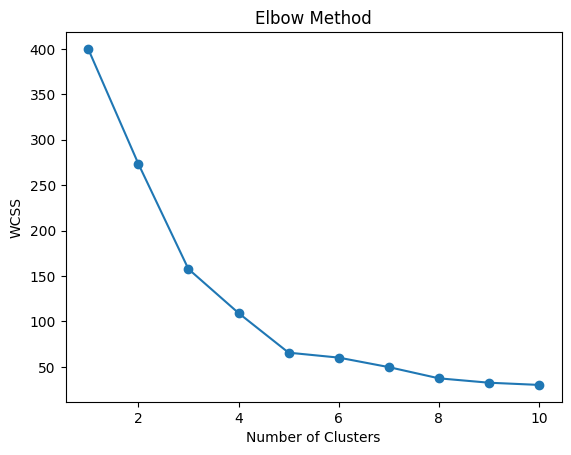

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

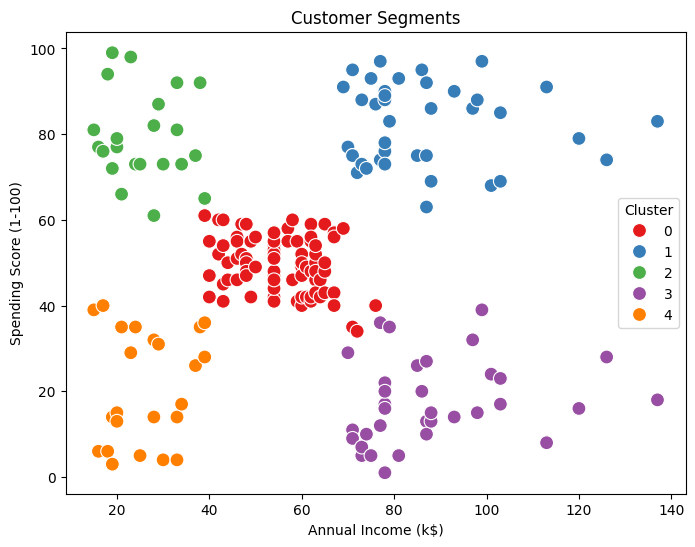

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Annual Income (k$)'],
                y=df['Spending Score (1-100)'],
                hue=df['Cluster'],
                palette='Set1',
                s=100)

plt.title('Customer Segments')
plt.show()

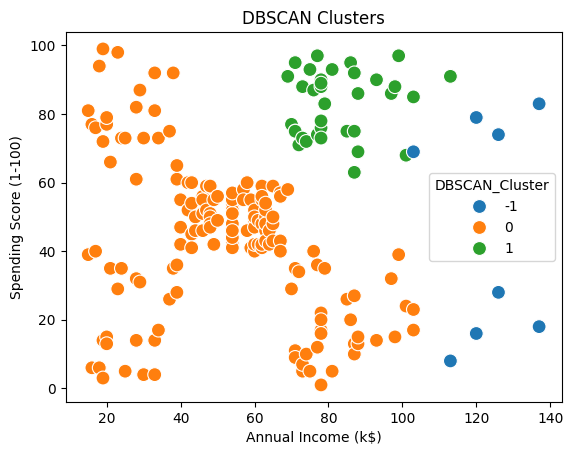

In [14]:
dbscan = DBSCAN(eps=0.5, min_samples=4)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

sns.scatterplot(x=df['Annual Income (k$)'],
                y=df['Spending Score (1-100)'],
                hue=df['DBSCAN_Cluster'],
                palette='tab10',
                s=100)
plt.title('DBSCAN Clusters')
plt.show()